<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *7*: *Regression***

###**Tenggat Waktu: 8 Mei 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab7_NPM_Nama.ipynb**. Contoh: A_Lab7_2106123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **TANGGAL**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

## **Pernyataan Integritas**

In [ ]:
# Isi dengan data diri Anda
NAMA = ""
KELAS = ""
NPM = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya,  dari kelas  dengan NPM , menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   ()


In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load spotifyreccomendation.csv
!gdown --id '1YzDCruQOvR2ADYokG4oRtPFrio9Z1_Kv'

# Load flag.csv
!gdown --id '1o8g4O27Pxi2PMZXG6okNMzx57e8sOPbA'

# Load constituents_financials.csv
!gdown --id '1lGCck9f6YtCvTdnr3I-7QvnKckzMPhxt'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YzDCruQOvR2ADYokG4oRtPFrio9Z1_Kv
To: /content/spotifyreccomendation.csv
100% 37.1k/37.1k [00:00<00:00, 61.2MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1o8g4O27Pxi2PMZXG6okNMzx57e8sOPbA
To: /content/flag.csv
100% 280k/280k [00:00<00:00, 94.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.goog

## Intro to Linear Models for Regression and Classification

Pada lab kali ini, Anda akan mengimplementasikan model-model linear untuk melakukan prediksi regresi maupun klasifikasi. Beberapa model tersebut antara lain:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Logistic Regression
- Softmax Regression

Sebelum ke latihan soal, kita akan melakukan persiapan data dan melihat secara ringkas teori dari masing-masing jenis regresi. Setelah itu, kita akan melakukan implementasi menggunakan library Scikit learn.

**NOTE:** Penjelasan yang diberikan pada setiap jenis regresi, sebagian besar, hanya untuk menunjukkan saja. Anda perlu belajar dari sumber lain (contoh: slide kuliah) untuk lebih memahami materi-materi di sini. Walau demikian, semoga penjelasan di sini dapat membantu Anda :)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression

from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, precision_score, recall_score, accuracy_score

## Penjelasan Dataset

Deskripsi dataset cancer_reg:
Dataset berisi data survey sensus di Amerika. Berikut merupakan deskripsi dari setiap atribut
pada dataset:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer
mortalities(a)
* avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
* avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)
* incidenceRate: Mean per capita (100,000) cancer diagoses(a)
* medianIncome: Median income per county (b)
* popEst2015: Population of county (b)
* povertyPercent: Percent of populace in poverty (b)
* studyPerCap: Per capita number of cancer-related clinical trials per county (a)
* binnedInc: Median income per capita binned by decile (b)
* MedianAge: Median age of county residents (b)
* MedianAgeMale: Median age of male county residents (b)
* MedianAgeFemale: Median age of female county residents (b)
* Geography: County name (b)
* AvgHouseholdSize: Mean household size of county (b)
* PercentMarried: Percent of county residents who are married (b)
* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained:
less than high school (b)
* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high
school diploma (b)
* PctSomeCol18_24: Percent of county residents ages 18-24 highest education
attained: some college (b)
* PctBachDeg18_24: Percent of county residents ages 18-24 highest education
attained: bachelor's degree (b)
PctHS25_Over: Percent of county residents ages 25 and over highest education
attained: high school diploma (b)
* PctBachDeg25_Over: Percent of county residents ages 25 and over highest
education attained: bachelor's degree (b)
* PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)
* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed
(b)
* PctPrivateCoverage: Percent of county residents with private health coverage (b)
* PctPrivateCoverageAlone: Percent of county residents with private health coverage
alone (no public assistance) (b)
* PctEmpPrivCoverage: Percent of county residents with employee-provided private
health coverage (b)
* PctPublicCoverage: Percent of county residents with government-provided health
coverage (b)
* PctPubliceCoverageAlone: Percent of county residents with government-provided
health coverage alone (b)
* PctWhite: Percent of county residents who identify as White (b)
* PctBlack: Percent of county residents who identify as Black (b)
* PctAsian: Percent of county residents who identify as Asian (b)
* PctOtherRace: Percent of county residents who identify in a category which is not
White, Black, or Asian (b)
* PctMarriedHouseholds: Percent of married households (b)
* BirthRate: Number of live births relative to number of women in county (b)

In [ ]:
df = pd.read_csv('/content/cancer_reg.csv', encoding='ISO-8859-1')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [ ]:
df.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [ ]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


<ipython-input-253-e88a88581129>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')


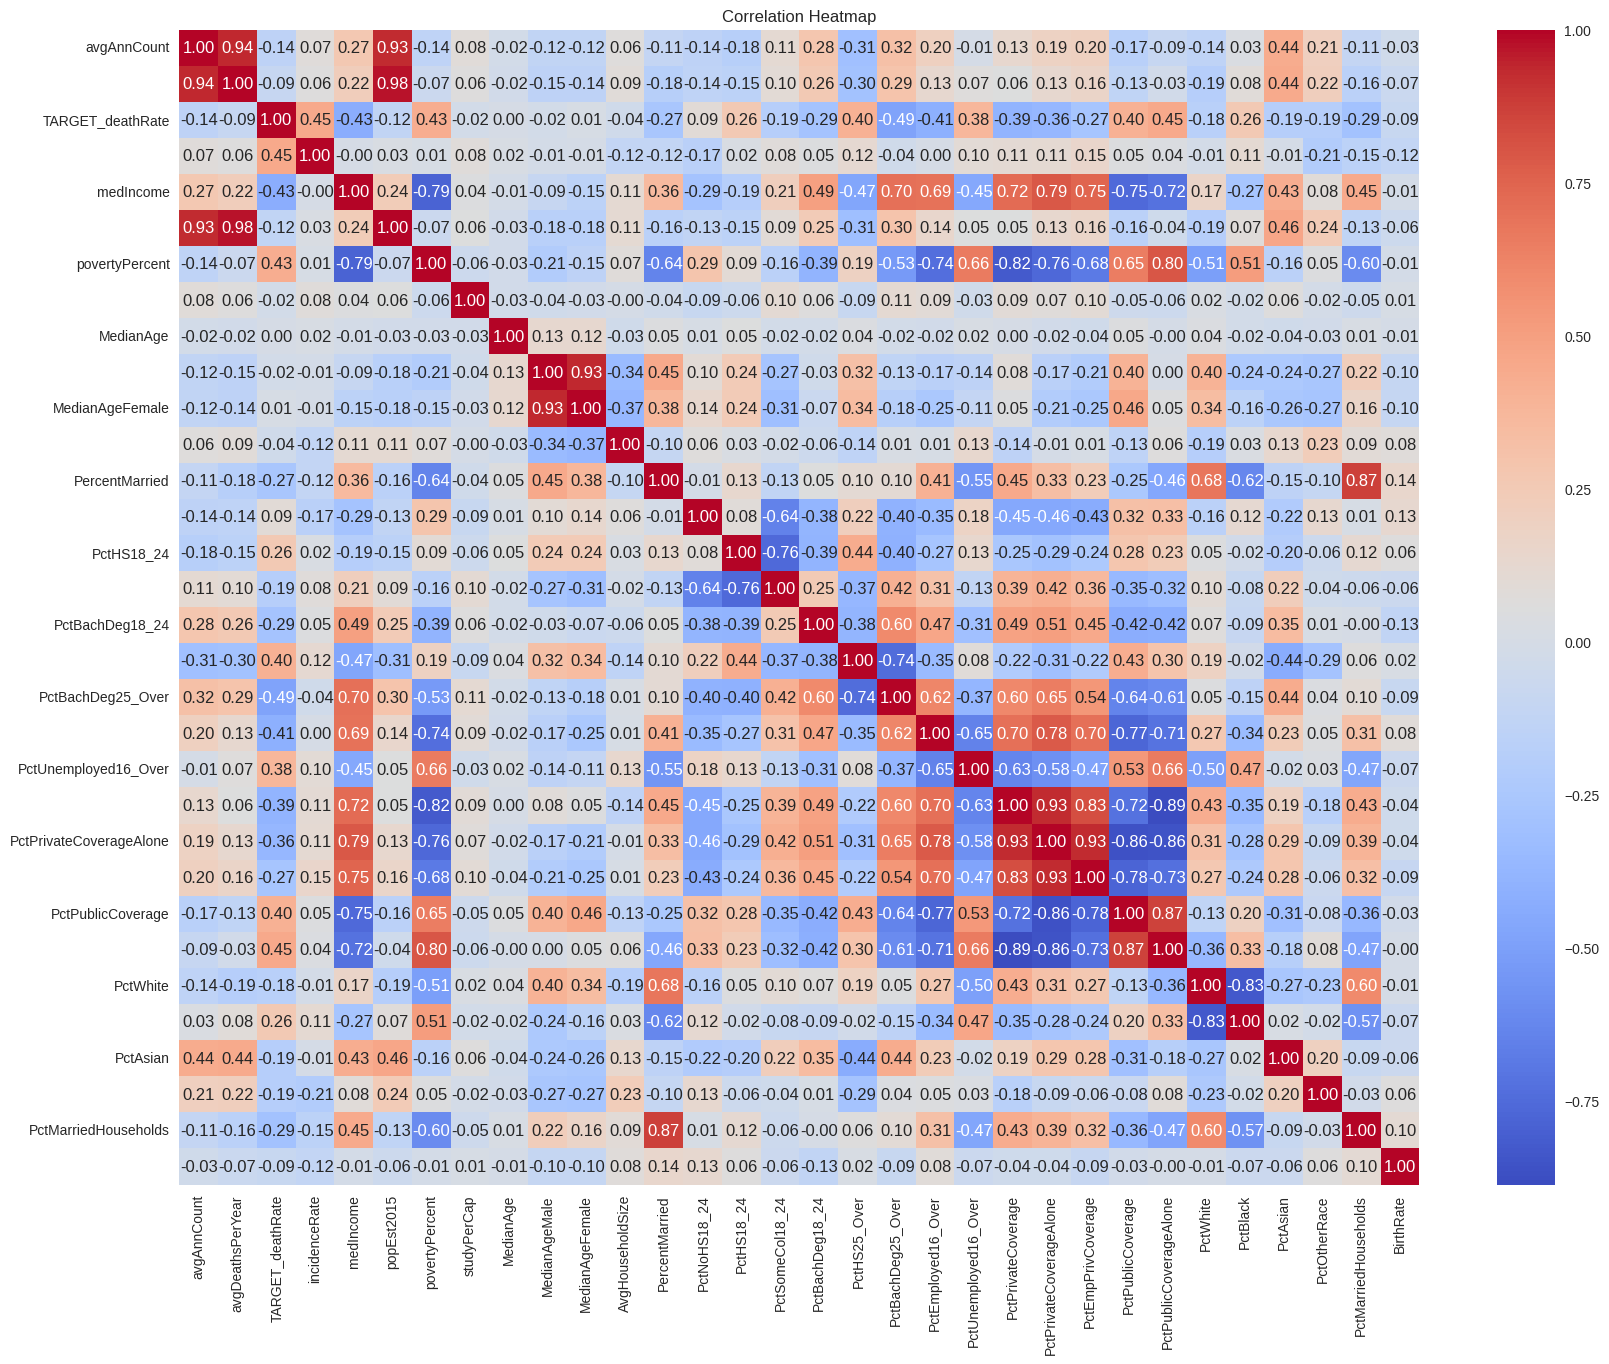

In [ ]:
heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')

# Set the title of the plot
heatmap.set_title('Correlation Heatmap')

# Get the figure object and set the size
fig = heatmap.get_figure()
fig.set_size_inches(20, 15)

# Display the plot
plt.show()

##**Data Preprocessing**

1. a) Lakukan penanganan terhadap missing values, duplikasi data, dan outliers jika ada.

> Catatan: 
* Mahasiswa diharapkan dapat melakukan eksplorasi preprocessing pada data sehingga dihasilkan hasil yang baik.
* Semakin baik r2 score yang dihasilkan, maka semakin baik nilai yang anda dapatkan.

Penentuan fitur serta label yang akan digunakan.

In [ ]:
X = df.drop(columns=['TARGET_deathRate'])
y = df['TARGET_deathRate']

1. b) Bagi data ke dalam data uji dan data latih dengan 80% training set menggunakan `train_test_split`.

1. c) Lakukan pemilihan fitur-fitur yang relevan untuk melakukan regresi serta tampilkan fitur-fitur yang terpilih. 

##**Linear Regression**

Linear regression adalah teknik pencarian nilai-nilai parameter suatu persamaan linear yang cocok dengan data. Persamaan linear yang cocok adalah persamaan yang memiliki perbedaan hasil prediksi dan aktual minimal.

Contoh persamaan linear

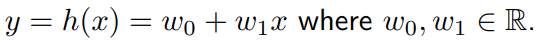

Persamaan di atas adalah fungsi yang memetakan **X** ke **Y** (anggap Y = h(x)), dengan:
- w0 adalah intersep
- w1 adalah koefisien
- x adalah variabel independen
- y adalah variabel dependen

Tentunya, persamaan ini bisa digeneralisasikan untuk banyak nilai x (fitur lebih dari 1) untuk menentukan nilai y. Berikut adalah persamaannya.

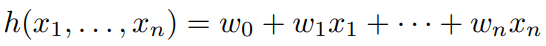

atau

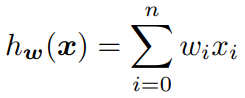

Nilai-nilai parameter seperti w0, w1, w2, wn, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimal kan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression.

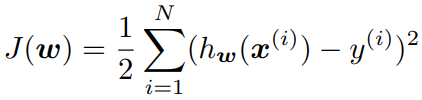

Proses peminimalan fungsi loss disebut dengan gradient descent yang bisa Anda pelajari lebih lanjut dari slide kuliah.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Linear Regression menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

2. a) Buatlah sebuah model regresi linear berdasarkan fitur-fitur yang terpilih sebelumnya serta tampilkan hasil prediksinya pada keseluruhan data uji.

2. b) Visualisasikan kinerja model **regresi linear** yang sudah dipilih sebelumnya pada keseluruhan data uji serta tampilkan nilai eksak dari R squared yang dihasilkan dengan menggunakan **cross validation** untuk mendapatkan performa kinerja sebenarnya menggunakan data latih yang ada.

> Catatan: Jumlah split dibebaskan.

## Lasso, Ridge Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension). 

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

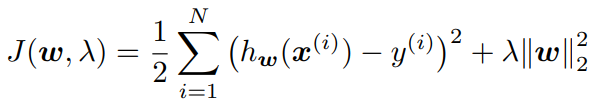

- Lasso Regression

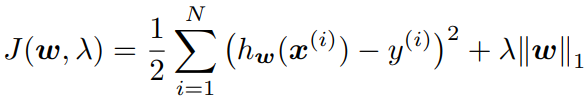

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasinya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

###**Lasso Regression**

3. a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

3. b) Buatlah (fit) model regresi lasso berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

3. c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model pada testing set

3. d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

3. e) Tampilkan array hasil prediksi dari model ridge yang terpilih pada keseluruhan data uji.

3. f) Visualisasikan kinerja model **regresi lasso** yang sudah dipilih sebelumnya pada keseluruhan data uji serta tampilkan nilai eksak dari R squared yang dihasilkan dengan menggunakan **cross validation** untuk mendapatkan performa kinerja sebenarnya menggunakan data latih yang ada.

> Catatan: Jumlah split dibebaskan.

3. g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Jawaban:

###**Ridge Regression**

4. a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

4. b) Buatlah model regresi ridge berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan. 

> Catatan: Abaikan warning mengenai ill-conditioned matrix jika ada.

4. c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model pada testing set

4. d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

4. e) Tampilkan array hasil prediksi dari model ridge yang terpilih pada keseluruhan data uji.

4. f) Visualisasikan kinerja model **regresi ridge** yang sudah dipilih sebelumnya pada keseluruhan data uji serta tampilkan nilai eksak dari R squared yang dihasilkan dengan menggunakan **cross validation** untuk mendapatkan performa kinerja sebenarnya menggunakan data latih yang ada.

> Catatan: Jumlah split dibebaskan

4. g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Jawaban:

4. h) Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Jawaban:

##**Logistic, Softmax Regression**

Logistic dan Softmax merupakan jenis regresi yang menghasilkan output diskrit yang dapat berupa binary classification maupun multiclass classification.

###**Logistic Regression**

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

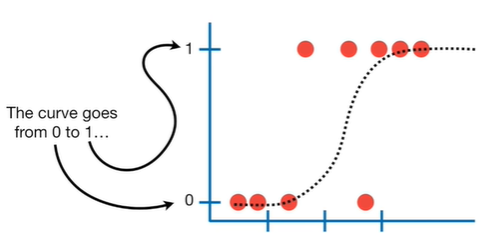

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

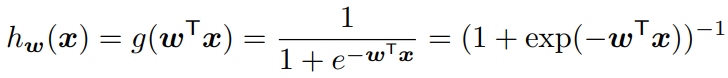

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual. 

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

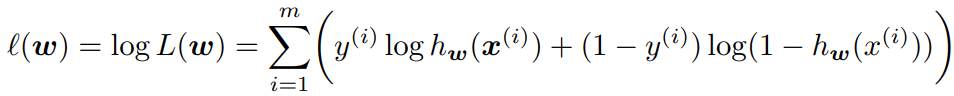

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
df_logistic = pd.read_csv('/content/spotifyreccomendation.csv').drop(columns=['title', 'first_artists', 'all_artists'])
df_logistic.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,like
0,0.486,0.881,2,-5.623,0,0.0474,0.024400,0.000000,0.429,0.6670,144.997,480707,4,1
1,0.356,0.960,4,-3.487,1,0.1040,0.014200,0.000000,0.209,0.0857,125.921,204733,4,1
2,0.487,0.949,2,-4.217,0,0.0798,0.000429,0.000029,0.231,0.4060,110.020,352427,4,1
3,0.366,0.963,11,-5.301,0,0.1420,0.000273,0.012200,0.115,0.2110,137.114,366213,4,1
4,0.412,0.920,9,-4.852,0,0.0575,0.000456,0.002600,0.110,0.4550,93.162,227440,4,1


In [ ]:
df_logistic.like.value_counts()

0    151
1    150
Name: like, dtype: int64

In [ ]:
print(df_logistic.isna().any())
print()
print(f'Length of the data: {len(df_logistic)}')
print()
df_logistic.info()

danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
time_signature      False
like                False
dtype: bool

Length of the data: 301

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      301 non-null    float64
 1   energy            301 non-null    float64
 2   key               301 non-null    int64  
 3   loudness          301 non-null    float64
 4   mode              301 non-null    int64  
 5   speechiness       301 non-null    float64
 6   acousticness      301 non-null    float64
 7   instrumentalness  301 non-null    float64
 8   liveness          

In [ ]:
X_logistic = df_logistic.drop(columns=['like'])
y_logistic = df_logistic.like

5. a) Bagi data ke dalam training dan test set dengan ukuran training sebesar 80% dari jumlah data.

####Pembuatan Model dengan Data Asli

5. b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `hasil prediksi`, `confusion matrix`, dan `hasil evaluasi metriknya`. Setelah itu, lakukan **cross validation** untuk menilai performa sebenarnya dari model menggunakan data latih yang ada.

> `hasil evaluasi metriknya` mencakup: 
* F1 Macro Average, 
* F1 Micro Average, 
* Precision Macro Average 
* Precision Micro Average 
* Recall Macro Average
* Recall Micro Average

> Scoring dari cross validation:
* Accuracy
* F1 Macro
* Recall Macro

####Pembuatan Model dengan Data yang Dinormalisasi

5. c) Lakukan normalisasi terhadap data fitur yang akan digunakan.

5. d) Buatlah suatu model logistic regression berdasarkan data yang sudah di normalisasi serta tampilkan `hasil prediksi`, `confusion matrix`, dan `hasil evaluasi metriknya`. Setelah itu, lakukan **cross validation** untuk menilai performa sebenarnya dari model menggunakan data latih yang ada.

>`hasil evaluasi metriknya` mencakup: 
* F1 Macro Average, 
* F1 Micro Average, 
* Precision Macro Average 
* Precision Micro Average 
* Recall Macro Average
* Recall Micro Average

> Scoring dari cross validation:
* Accuracy
* F1 Macro
* Recall Macro



5. e) Dari kedua model yang dibangun dengan data yang di normalisasi dan data yang tidak dinormalisasi, manakah yang memberikan performa terbaik? berikan analisis mengenai hal tersebut.

Jawaban:

###**Softmax Regression**

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

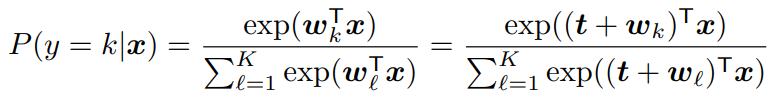

Persamaan likelihood softmaxe regression:

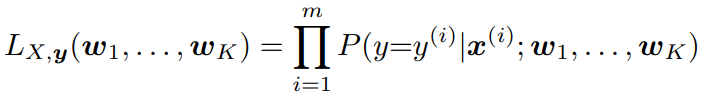

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 

Note: sama dengan link yang ada pada bagian Logistic Regression

Dataset Source: https://www.kaggle.com/datasets/supportvectorsailab/flaglike

In [ ]:
df_softmax = pd.read_csv('/content/flag.csv')
df_softmax.head()

,x1,x2,t
0,5.056366,0.939336,0.0
1,2.981938,-79.924557,0.0
2,4.665495,-96.107950,0.0
3,2.218880,26.874929,0.0
4,4.275082,-81.303200,0.0


In [ ]:
df_softmax.t.value_counts()

2.0    2459
0.0    2000
1.0    1856
Name: t, dtype: int64

In [ ]:
print(df_softmax.isna().any())
print()
print(f'Length of the data: {len(df_softmax)}')
print()
df_softmax.info()

x1    False
x2    False
t     False
dtype: bool

Length of the data: 6315

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6315 entries, 0 to 6314
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6315 non-null   float64
 1   x2      6315 non-null   float64
 2   t       6315 non-null   float64
dtypes: float64(3)
memory usage: 148.1 KB


In [ ]:
X_softmax = df_softmax.drop(columns=['t'])
y_softmax = df_softmax.t

6. a) Bagi data ke dalam training dan test set dengan ukuran training sebesar 80% dari jumlah data.

6. b) Lakukan normalisasi pada data.

6. c) Buatlah suatu model softmax regression yang dilatih menggunakan data yang sebelumnya telah dinormalisasi serta tampilkan `hasil prediksi`, `confusion matrix`, dan `hasil evaluasi metriknya`. Setelah itu, lakukan **cross validation** untuk menilai performa sebenarnya dari model yang ada.

>`hasil evaluasi metriknya` mencakup: 
* F1 Macro Average, 
* F1 Micro Average, 
* Precision Macro Average 
* Precision Micro Average 
* Recall Macro Average
* Recall Micro Average

> Scoring dari cross validation:
* Accuracy
* F1 Macro
* Recall Macro

6. d) Berikan analisis mengenai perbedaan antara regresi softmax dengan regresi logistik.

Jawaban: